# HumanActivityRecognition

<br>


This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.

This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors (accelerometer and Gyroscope) in that smartphone. This experiment was video recorded to label the data manually.

## How data was recorded

By using the sensors(Gyroscope and accelerometer) in a smartphone, they have captured '3-axial linear acceleration'(_tAcc-XYZ_) from accelerometer and '3-axial angular velocity' (_tGyro-XYZ_) from Gyroscope with several variations. 

> prefix 't' in those metrics denotes time.

> suffix 'XYZ' represents 3-axial signals in X , Y, and Z directions.

### Feature names

1. These sensor signals are preprocessed by applying noise filters and then sampled in fixed-width windows(sliding windows) of 2.56 seconds each with 50% overlap. ie., each window has 128 readings. 

2. From Each window, a feature vector was obtianed by calculating variables from the time and frequency domain.
> In our dataset, each datapoint represents a window with different readings 
3. The accelertion signal was saperated into Body and Gravity acceleration signals(___tBodyAcc-XYZ___ and ___tGravityAcc-XYZ___) using some low pass filter with corner frequecy of 0.3Hz.

4. After that, the body linear acceleration and angular velocity were derived in time to obtian _jerk signals_ (___tBodyAccJerk-XYZ___ and ___tBodyGyroJerk-XYZ___). 

5. The magnitude of these 3-dimensional signals were calculated using the Euclidian norm. This magnitudes are represented as features with names like _tBodyAccMag_, _tGravityAccMag_, _tBodyAccJerkMag_, _tBodyGyroMag_ and _tBodyGyroJerkMag_.

6. Finally, We've got frequency domain signals from some of the available signals by applying a FFT (Fast Fourier Transform). These signals obtained were labeled with ___prefix 'f'___ just like original signals with ___prefix 't'___. These signals are labeled as ___fBodyAcc-XYZ___, ___fBodyGyroMag___ etc.,.

7. These are the signals that we got so far.
	+ tBodyAcc-XYZ
	+ tGravityAcc-XYZ
	+ tBodyAccJerk-XYZ
	+ tBodyGyro-XYZ
	+ tBodyGyroJerk-XYZ
	+ tBodyAccMag
	+ tGravityAccMag
	+ tBodyAccJerkMag
	+ tBodyGyroMag
	+ tBodyGyroJerkMag
	+ fBodyAcc-XYZ
	+ fBodyAccJerk-XYZ
	+ fBodyGyro-XYZ
	+ fBodyAccMag
	+ fBodyAccJerkMag
	+ fBodyGyroMag
	+ fBodyGyroJerkMag

8. We can esitmate some set of variables from the above signals. ie., We will estimate the following properties on each and every signal that we recoreded so far.

	+ ___mean()___: Mean value
	+ ___std()___: Standard deviation
	+ ___mad()___: Median absolute deviation 
	+ ___max()___: Largest value in array
	+ ___min()___: Smallest value in array
	+ ___sma()___: Signal magnitude area
	+ ___energy()___: Energy measure. Sum of the squares divided by the number of values. 
	+ ___iqr()___: Interquartile range 
	+ ___entropy()___: Signal entropy
	+ ___arCoeff()___: Autorregresion coefficients with Burg order equal to 4
	+ ___correlation()___: correlation coefficient between two signals
	+ ___maxInds()___: index of the frequency component with largest magnitude
	+ ___meanFreq()___: Weighted average of the frequency components to obtain a mean frequency
	+ ___skewness()___: skewness of the frequency domain signal 
	+ ___kurtosis()___: kurtosis of the frequency domain signal 
	+ ___bandsEnergy()___: Energy of a frequency interval within the 64 bins of the FFT of each window.
	+ ___angle()___: Angle between to vectors.

9. We can obtain some other vectors by taking the average of signals in a single window sample. These are used on the angle() variable'
`
	+ gravityMean
	+ tBodyAccMean
	+ tBodyAccJerkMean
	+ tBodyGyroMean
	+ tBodyGyroJerkMean


###  Y_Labels(Encoded)
+ In the dataset, Y_labels are represented as numbers from 1 to 6 as their identifiers.

	- WALKING as __1__
	- WALKING_UPSTAIRS as __2__
	- WALKING_DOWNSTAIRS as __3__
	- SITTING as __4__
	- STANDING as __5__
	- LAYING as __6__
    
## Train and test data were saperated
 - The readings from ___70%___ of the volunteers were taken as ___trianing data___ and remaining ___30%___ subjects recordings were taken for ___test data___
 
## Data

* All the data is present in 'UCI_HAR_dataset/' folder in present working directory.
     - Feature names are present in 'UCI_HAR_dataset/features.txt'
     - ___Train Data___
         - 'UCI_HAR_dataset/train/X_train.txt'
         - 'UCI_HAR_dataset/train/subject_train.txt'
         - 'UCI_HAR_dataset/train/y_train.txt'
     - ___Test Data___
         - 'UCI_HAR_dataset/test/X_test.txt'
         - 'UCI_HAR_dataset/test/subject_test.txt'
         - 'UCI_HAR_dataset/test/y_test.txt'
         

## Data Size :
> 27 MB


# Quick overview of the dataset :


* Accelerometer and Gyroscope readings are taken from 30 volunteers(referred as subjects) while performing the following 6 Activities.

    1. Walking     
    2. WalkingUpstairs 
    3. WalkingDownstairs 
    4. Standing 
    5. Sitting 
    6. Lying.


* Readings are divided into a window of 2.56 seconds with 50% overlapping. 

* Accelerometer readings are divided into gravity acceleration and body acceleration readings,
  which has x,y and z components each.

* Gyroscope readings are the measure of angular velocities which has x,y and z components.

* Jerk signals are calculated for BodyAcceleration readings.

* Fourier Transforms are made on the above time readings to obtain frequency readings.

* Now, on all the base signal readings., mean, max, mad, sma, arcoefficient, engerybands,entropy etc., are calculated for each window.

* We get a feature vector of 561 features and these features are given in the dataset.

* Each window of readings is a datapoint of 561 features.

## Problem Framework

* 30 subjects(volunteers) data is randomly split to 70%(21) test and 30%(7) train data.
* Each datapoint corresponds one of the 6 Activities.


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.keras import backend as K
from keras.models import Sequential
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

# get the features from the file features.txt
features = list()
with open('UCI_HAR_Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


Using TensorFlow backend.


In [7]:
features_df = pd.DataFrame(features)
print('No of duplicate features: {}'.format(sum(features_df.duplicated())))

No of duplicate features: 84


In [8]:
print(list(features_df.columns))

[0]


## Obtain the  train data 

In [9]:
# get the data from txt files to pandas dataframe
X_train = pd.read_csv('E:/BOOKS NEW/Cases datasets/7. Human Activity Recognition/HAR/UCI_HAR_Dataset/train/X_train.txt', delim_whitespace=True, header=None)

# add subject column to the dataframe
X_train['subject'] = pd.read_csv('UCI_HAR_Dataset/train/subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('UCI_HAR_Dataset/train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample()

,0,1,2,3,4,5,6,7,8,9,...,554,555,556,557,558,559,560,subject,Activity,ActivityName
4932,0.273064,-0.005687,-0.09916,-0.991843,-0.942883,-0.858743,-0.992842,-0.94551,-0.859719,-0.937652,...,0.069997,0.0325,0.687609,-0.480016,-0.892113,0.040595,0.07224,23,4,SITTING


## Obtain the train and test data

In [10]:
train = pd.read_csv('UCI_HAR_dataset/csv_files/train.csv')
test = pd.read_csv('UCI_HAR_dataset/csv_files/test.csv')
print(train.shape, test.shape)

(7352, 564) (2947, 564)


In [11]:
train.head(3)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 554,Unnamed: 555,Unnamed: 556,Unnamed: 557,Unnamed: 558,Unnamed: 559,Unnamed: 560,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING


In [12]:
# get X_train and y_train from csv files
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

In [13]:
# get X_test and y_test from test csv file
X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

In [14]:
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


# Let's model with our data

### Labels that are useful in plotting confusion matrix

In [15]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

### Function to plot the confusion matrix

In [16]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Generic function to run any model specified

In [17]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results
    
    

### Method to print the gridsearch Attributes

In [18]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

# 1. Logistic Regression with Grid Search

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    8.8s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Done 
 

training_time(HH:MM:SS.ms) - 0:00:10.278021


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.004989


---------------------
|      Accuracy      |
---------------------

    0.9582626399728538


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 431  57   0   0   3]
 [  0  15 517   0   0   0]
 [  0   0   0 493   2   1]
 [  0   0   0   4 403  13]
 [  0   0   0  27   1 443]]


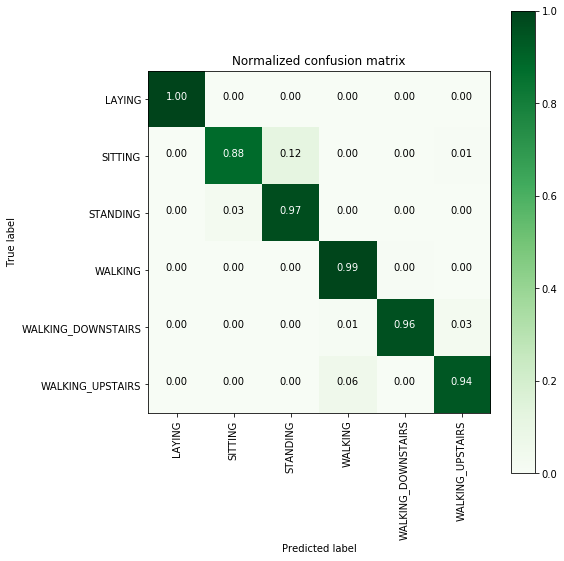

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.88      0.92       491
          STANDING       0.90      0.97      0.93       532
           WALKING       0.94      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.96      0.98       420
  WALKING_UPSTAIRS       0.96      0.94      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [14]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

#  2. Linear SVC with GridSearch

training the model..
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   25.7s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Done 
 

training_time(HH:MM:SS.ms) - 0:00:29.332573


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.004958


---------------------
|      Accuracy      |
---------------------

    0.9670851713607058


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  2 432  53   0   0   4]
 [  0  12 519   1   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   3 412   5]
 [  0   0   0  17   0 454]]


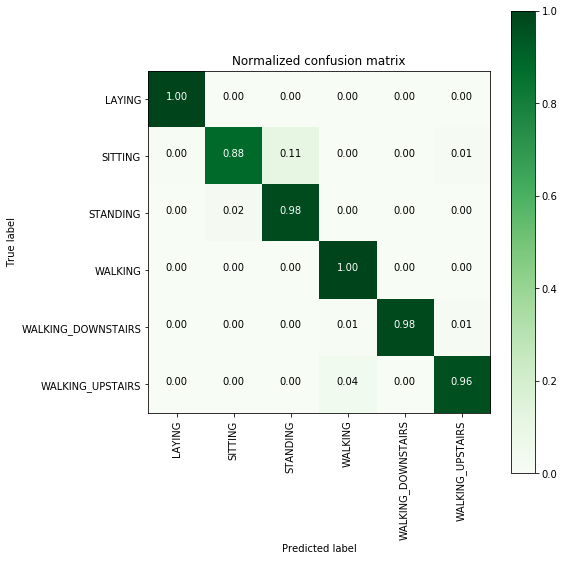

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.88      0.92       491
          STANDING       0.91      0.98      0.94       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.96      0.97       471

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947



In [15]:
from sklearn.svm import LinearSVC

parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [16]:
print_grid_search_attributes(lr_svc_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LinearSVC(C=0.5, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=5e-05,
          verbose=0)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 0.5}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9420643090682909



# 3.  Kernel SVM with GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:03:54.956716


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:02.075449


---------------------
|      Accuracy      |
---------------------

    0.9626739056667798


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 453]]


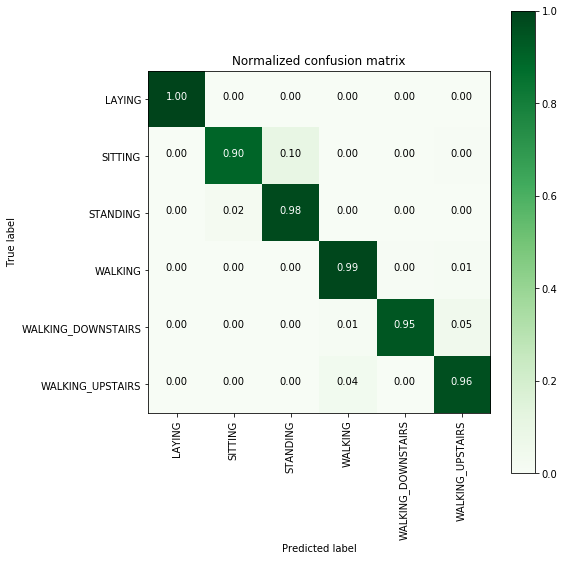

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [17]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [18]:
print_grid_search_attributes(rbf_svm_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=16, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0078125, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 16, 'gamma': 0.0078125}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9447834551903698



# 4. Decision Trees with GridSearchCV

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:07.334382


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.005984


---------------------
|      Accuracy      |
---------------------

    0.8747879199185612


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 372 119   0   0   0]
 [  0  61 471   0   0   0]
 [  0   0   0 474  16   6]
 [  0   0   0  24 349  47]
 [  0   0   0  70  26 375]]


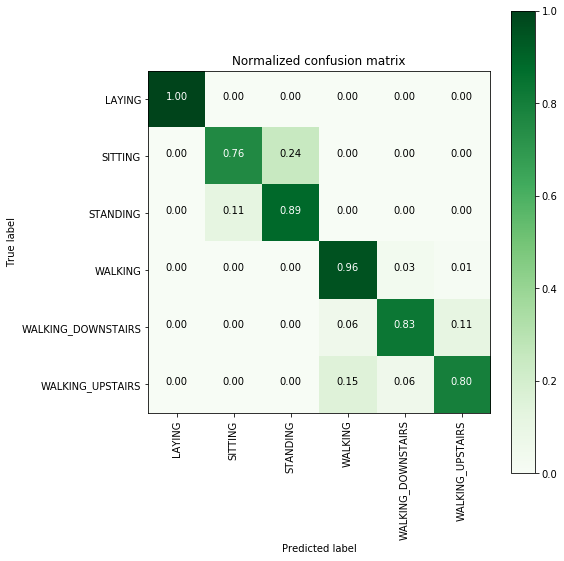

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.86      0.76      0.81       491
          STANDING       0.80      0.89      0.84       532
           WALKING       0.83      0.96      0.89       496
WALKING_DOWNSTAIRS       0.89      0.83      0.86       420
  WALKING_UPSTAIRS       0.88      0.80      0.83       471

          accuracy                           0.87      2947
         macro avg       0.88      0.87      0.87      2947
      weighted avg       0.88      0.87      0.87      2947

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
          

In [19]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(dt_grid_results['model'])

# 5. Random Forest Classifier with GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:04:06.516162


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.077795


---------------------
|      Accuracy      |
---------------------

    0.9277231082456736


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 439  52   0   0   0]
 [  0  42 490   0   0   0]
 [  0   0   0 480  13   3]
 [  0   0   0  21 355  44]
 [  0   0   0  31   7 433]]


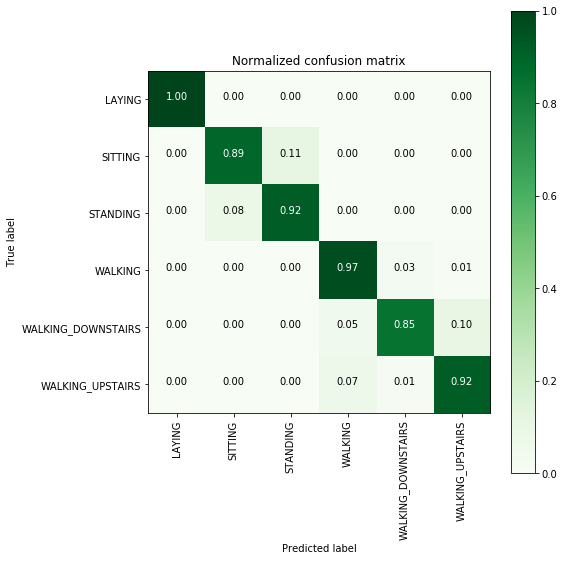

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.89      0.90       491
          STANDING       0.90      0.92      0.91       532
           WALKING       0.90      0.97      0.93       496
WALKING_DOWNSTAIRS       0.95      0.85      0.89       420
  WALKING_UPSTAIRS       0.90      0.92      0.91       471

          accuracy                           0.93      2947
         macro avg       0.93      0.92      0.93      2947
      weighted avg       0.93      0.93      0.93      2947

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=13, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       mi

In [20]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(rfc_grid_results['model'])

# 6.  Gradient Boosted Decision Trees With GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 1:34:15.975005


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.053854


---------------------
|      Accuracy      |
---------------------

    0.9239904988123515


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 403  86   0   0   2]
 [  0  37 495   0   0   0]
 [  0   0   0 481   7   8]
 [  0   0   0   8 371  41]
 [  0   1   0  29   5 436]]


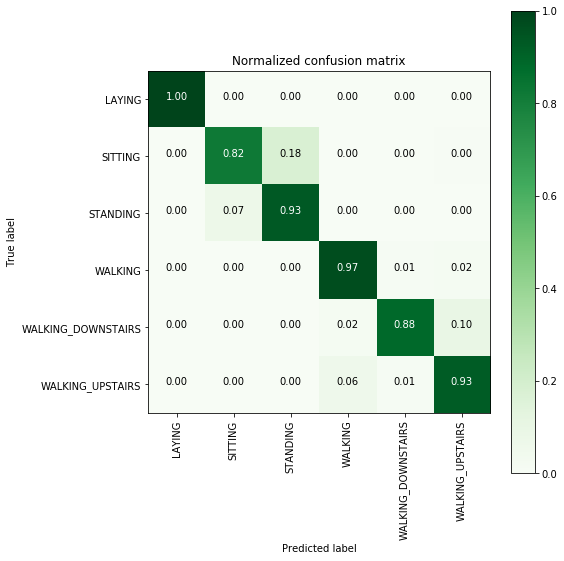

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.82      0.86       491
          STANDING       0.85      0.93      0.89       532
           WALKING       0.93      0.97      0.95       496
WALKING_DOWNSTAIRS       0.97      0.88      0.92       420
  WALKING_UPSTAIRS       0.90      0.93      0.91       471

          accuracy                           0.92      2947
         macro avg       0.93      0.92      0.92      2947
      weighted avg       0.93      0.92      0.92      2947

--------------------------
|      Best Estimator     |
--------------------------

	GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
              

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'max_depth': np.arange(5,8,1), \
             'n_estimators':np.arange(130,170,10)}
gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid, n_jobs=-1)
gbdt_grid_results = perform_model(gbdt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(gbdt_grid_results['model'])

# 7. Comparing all models

In [22]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))

print('rbf SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results['accuracy'] * 100)))

print('DecisionTree        : {:.04}%      {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))
print('GradientBoosting DT : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                        100-(rfc_grid_results['accuracy'] * 100)))


                     Accuracy     Error
                     ----------   --------
Logistic Regression : 95.83%       4.174%
Linear SVC          : 96.71%       3.291% 
rbf SVM classifier  : 96.27%      3.733% 
DecisionTree        : 87.48%      12.52% 
Random Forest       : 92.77%      7.228% 
GradientBoosting DT : 92.77%      7.228% 


> We can choose ___Logistic regression___ or ___Linear SVC___ or ___rbf SVM___.

# 8) Deep Learning Methods

# 8.1) LSTM

In [23]:
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

# Utility function to print the confusion matrix
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

## 8.1.1 Data

In [26]:
# Data directory
DATADIR = 'UCI_HAR_Dataset'

In [27]:
# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

In [26]:
# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None,encoding='utf-8')

# Utility function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).values
            #_read_csv(filename).as_matrix()
            #coords = df.as_matrix(columns=['Latitude','Longitude'])
            #coords = df[["Latitude", "Longitude"]].values
        ) 

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

In [27]:
def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).values

In [28]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test

In [29]:
# Importing tensorflow
np.random.seed(42)# The np.random.seed function provides an input for the pseudo-random number generator in Python.
import tensorflow as tf
#tf.set_random_seed(42)
tf.random.set_seed(42)

In [30]:
# Configuring a session
#tf.ConfigProto

session_conf = tf.compat.v1.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)

In [31]:
# Import Keras
#tf.Session
#tf.get_default_graph()
#from keras import backend as K
from tensorflow.python.keras import backend as K
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
K.set_session(sess)

In [32]:
# Importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

# Initializing parameters
epochs = 30
batch_size = 16
n_hidden = 32

In [33]:
# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [34]:
# Loading the train and test data
X_train, X_test, Y_train, Y_test = load_data()

In [35]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)

print(timesteps)
print(input_dim)
print(len(X_train))

128
9
7352


## 8.1.2 Architecture of LSTM

In [36]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim))) # dimensionality of the output space=1st parameter
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                5376      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 198       
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [38]:
# Training the model
model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 43s 6ms/step - loss: 1.2997 - accuracy: 0.4619 - val_loss: 1.0857 - val_accuracy: 0.5450
Epoch 2/30
7352/7352 [==============================] - 42s 6ms/step - loss: 0.9115 - accuracy: 0.6091 - val_loss: 0.8464 - val_accuracy: 0.6108
Epoch 3/30
7352/7352 [==============================] - 41s 6ms/step - loss: 0.8033 - accuracy: 0.6344 - val_loss: 0.8801 - val_accuracy: 0.5898
Epoch 4/30
7352/7352 [==============================] - 41s 6ms/step - loss: 0.6924 - accuracy: 0.6598 - val_loss: 0.7201 - val_accuracy: 0.6111
Epoch 5/30
7352/7352 [==============================] - 41s 6ms/step - loss: 0.6595 - accuracy: 0.6733 - val_loss: 0.7724 - val_accuracy: 0.6328
Epoch 6/30
7352/7352 [==============================] - 42s 6ms/step - loss: 0.6587 - accuracy: 0.6789 - val_loss: 0.7239 - val_accuracy: 0.6600
Epoch 7/30
7352/7352 [==============================] - 42s 6ms/step - loss: 0.591

In [39]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  0      379       101        4                   6   
STANDING                 0       83       443        1                   1   
WALKING                  0        0         0      426                  39   
WALKING_DOWNSTAIRS       0        0         0        0                 418   
WALKING_UPSTAIRS         0        0         0        2                  52   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            1  
STANDING                           4  
WALKING                           31  
WALKING_DOWNSTAIRS                 2  
WALKING_UPSTAIRS                 417  


In [40]:
score = model.evaluate(X_test, Y_test)

2947/2947 [==============================] - 2s 570us/step


In [41]:
score

[0.6149466411874392, 0.8890396952629089]

# 8.1.3 Adding more layers in LSTM

In [42]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(32,return_sequences=True,input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))

model.add(LSTM(28,input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.6))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 128, 32)           5376      
_________________________________________________________________
dropout_2 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 28)                6832      
_________________________________________________________________
dropout_3 (Dropout)          (None, 28)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 174       
Total params: 12,382
Trainable params: 12,382
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [44]:
#Training the model
model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 84s 11ms/step - loss: 1.2226 - accuracy: 0.5175 - val_loss: 0.8858 - val_accuracy: 0.6301
Epoch 2/30
7352/7352 [==============================] - 83s 11ms/step - loss: 0.8585 - accuracy: 0.6254 - val_loss: 0.7991 - val_accuracy: 0.5996
Epoch 3/30
7352/7352 [==============================] - 83s 11ms/step - loss: 0.7724 - accuracy: 0.6425 - val_loss: 0.7723 - val_accuracy: 0.6128
Epoch 4/30
7352/7352 [==============================] - 83s 11ms/step - loss: 0.7658 - accuracy: 0.6549 - val_loss: 0.8162 - val_accuracy: 0.6759
Epoch 5/30
7352/7352 [==============================] - 83s 11ms/step - loss: 0.6941 - accuracy: 0.6859 - val_loss: 0.7667 - val_accuracy: 0.7031
Epoch 6/30
7352/7352 [==============================] - 83s 11ms/step - loss: 0.6344 - accuracy: 0.7318 - val_loss: 0.6183 - val_accuracy: 0.7374
Epoch 7/30
7352/7352 [==============================] - 86s 12ms/step - loss

1)90.13% Accuracy

2)1.23% increase in Accuracy between 1 Layer of LSTM and 2 Layers of LSTM.

3)The Train loss and the validation loss has a huge difference, so now we add L2 regularization to minimize the error.

recurrent_regularization()
https://keras.io/api/layers/recurrent_layers/lstm/

In [45]:
from keras.regularizers import l2
model = Sequential()
# Configuring the parameters
model.add(LSTM(32,recurrent_regularizer=l2(0.003),return_sequences=True,input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))

model.add(LSTM(28,input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.6))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 128, 32)           5376      
_________________________________________________________________
dropout_4 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 28)                6832      
_________________________________________________________________
dropout_5 (Dropout)          (None, 28)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 174       
Total params: 12,382
Trainable params: 12,382
Non-trainable params: 0
_________________________________________________________________


In [46]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [47]:
# Training the model
History = model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=10)

Train on 7352 samples, validate on 2947 samples
Epoch 1/10
7352/7352 [==============================] - 86s 12ms/step - loss: 1.4069 - accuracy: 0.4047 - val_loss: 1.1523 - val_accuracy: 0.5745
Epoch 2/10
7352/7352 [==============================] - 86s 12ms/step - loss: 0.9823 - accuracy: 0.5865 - val_loss: 0.8636 - val_accuracy: 0.5989
Epoch 3/10
7352/7352 [==============================] - 86s 12ms/step - loss: 0.8136 - accuracy: 0.6314 - val_loss: 0.7569 - val_accuracy: 0.6288
Epoch 4/10
7352/7352 [==============================] - 86s 12ms/step - loss: 0.8333 - accuracy: 0.6386 - val_loss: 0.8920 - val_accuracy: 0.5969
Epoch 5/10
7352/7352 [==============================] - 85s 12ms/step - loss: 0.7802 - accuracy: 0.6447 - val_loss: 0.7715 - val_accuracy: 0.6196
Epoch 6/10
7352/7352 [==============================] - 85s 12ms/step - loss: 0.7550 - accuracy: 0.6541 - val_loss: 0.7418 - val_accuracy: 0.6203
Epoch 7/10
7352/7352 [==============================] - 85s 12ms/step - loss

Accuracy has dropped to 79.91%

## 8.1.4 Hyper-Parameter Tuning with Hyperas and Applying LSTM with best Hyper-Parameters

In [49]:
# Importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform
from hyperas.utils import eval_hyperopt_space
#https://github.com/UdiBhaskar/Human-Activity-Recognition--Using-Deep-NN/blob/master/Human%20Activity%20Detection.ipynb

In [37]:
##gives train and validation data 
def data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    # Data directory
    DATADIR = 'UCI_HAR_Dataset'
    # Raw data signals
    # Signals are from Accelerometer and Gyroscope
    # The signals are in x,y,z directions
    # Sensor signals are filtered to have only body acceleration
    # excluding the acceleration due to gravity
    # Triaxial acceleration from the accelerometer is total acceleration
    SIGNALS = [
        "body_acc_x",
        "body_acc_y",
        "body_acc_z",
        "body_gyro_x",
        "body_gyro_y",
        "body_gyro_z",
        "total_acc_x",
        "total_acc_y",
        "total_acc_z"
        ]
    # Utility function to read the data from csv file
    def _read_csv(filename):
        return pd.read_csv(filename, delim_whitespace=True, header=None,encoding='utf-8')

    # Utility function to load the load
    def load_signals(subset):
        signals_data = []

        for signal in SIGNALS:
            filename = f'UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
            signals_data.append( _read_csv(filename).values) 

        # Transpose is used to change the dimensionality of the output,
        # aggregating the signals by combination of sample/timestep.
        # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
        return np.transpose(signals_data, (1, 2, 0))
    
    def load_y(subset):
        """
        The objective that we are trying to predict is a integer, from 1 to 6,
        that represents a human activity. We return a binary representation of 
        every sample objective as a 6 bits vector using One Hot Encoding
        (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
        """
        filename = f'UCI_HAR_Dataset/{subset}/y_{subset}.txt'
        y = _read_csv(filename)[0]
        return pd.get_dummies(y).values
    
    X_train, X_val = load_signals('train'), load_signals('test')
    Y_train, Y_val = load_y('train'), load_y('test')

    return X_train, Y_train, X_val,  Y_val

In [50]:
from keras.regularizers import l2
import keras

##model
def model(X_train, Y_train, X_val, Y_val):
    # Importing tensorflow
    np.random.seed(36)
    import tensorflow as tf
    #tf.set_random_seed(36)
    tf.random.set_seed(36)
    # Initiliazing the sequential model
    model = Sequential() 
    # choice==============>Gives out one of the input options randomly as output 
    if ({{choice(['one', 'two'])}}) == 'two':
        # Configuring the parameters
        # choice function (selector, selection)=======> A choice function (selector, selection) is a mathematical function f that is defined on some collection X of nonempty sets and assigns to each set S in that collection some element f(S) of S. In other words, f is a choice function for X if and only if it belongs to the direct product of X.
        # uniform() =============>returns a random floating-point number between a given range of numbers
        model.add(LSTM({{choice([28,32,38])}},recurrent_regularizer=l2({{uniform(0,0.0002)}}),return_sequences=True,input_shape=(128, 9),name='LSTM2_1'))
        # Adding a dropout layer
        model.add(Dropout({{uniform(0.35,0.65)}},name='Dropout2_1'))
        model.add(LSTM({{choice([26,32,36])}},recurrent_regularizer=l2({{uniform(0,0.001)}}),input_shape=(128, 9),name='LSTM2_2'))
        model.add(Dropout({{uniform(0.5,0.7)}},name='Dropout2_2'))
        # Adding a dense output layer with sigmoid activation
        model.add(Dense(6, activation='sigmoid'))
    else:
        # Configuring the parameters
        model.add(LSTM({{choice([28,32,36])}},recurrent_regularizer=l2({{uniform(0,0.001)}}),input_shape=(128, 9),name='LSTM1_1'))
        # Adding a dropout layer
        model.add(Dropout({{uniform(0.35,0.55)}},name='Dropout1_1'))
        # Adding a dense output layer with sigmoid activation
        model.add(Dense(6, activation='sigmoid'))
        
    adam = keras.optimizers.Adam(lr={{uniform(0.009,0.025)}})
    rmsprop = keras.optimizers.RMSprop(lr={{uniform(0.009,0.025)}})
   
    choiceval = {{choice(['adam', 'rmsprop'])}}
    
    if choiceval == 'adam':
        optim = adam
    else:
        optim = rmsprop
    
    print(model.summary())
        
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=optim)
    
    result = model.fit(X_train, Y_train,
              batch_size=16,
              nb_epoch=30,
              verbose=2,
              validation_data=(X_val, Y_val))
                       
    score, acc = model.evaluate(X_val, Y_val, verbose=0)
    print('Test accuracy:', acc)
    print('-------------------------------------------------------------------------------------')
    return {'loss': -acc, 'status': STATUS_OK, 'model': model}

In [51]:
X_train, Y_train, X_val, Y_val = data()
trials = Trials()
best_run, best_model, space = optim.minimize(model=model,
                                      data=data,
                                      algo=tpe.suggest,
                                      max_evals=15,
                                      trials=trials,notebook_name = 'Untitled',
                                     return_space = True)

>>> Imports:
#coding=utf-8

try:
    import numpy as np
except:
    pass

try:
    import pandas as pd
except:
    pass

try:
    import seaborn as sns
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    import tensorflow as tf
except:
    pass

try:
    from tensorflow.python.keras import backend as K
except:
    pass

try:
    from keras.models import Sequential
except:
    pass

try:
    import itertools
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    from sklearn.metrics import confusion_matrix
except:
    pass

try:
    from datetime import datetime
except:
    pass

try:
    from sklearn import linear_model
except:
    pass

try:
    from sklearn import metrics
except:
    pass

try:
    from sklearn.model_selection import GridSearchCV
except:
    pass

try:
    from sklearn.svm import LinearSVC
except:
    pass

try:
    from sklearn.svm import SVC
except:
    pa

  0%|                                                                           | 0/15 [00:00<?, ?trial/s, best loss=?]WARNING:tensorflow:Large dropout rate: 0.518883 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
Model: "sequential_4"                                                                                                  
_________________________________________________________________                                                      
Layer (type)                 Output Shape              Param #                                                         
LSTM1_1 (LSTM)               (None, 32)                5376                                                            
_________________________________________________________________                                                      
Dropout1_1 (Dropout)         (None, 32)                0                                                               

C:\Users\sesha\Untitled Folder\7. Human Activity Recognition\HAR\temp_model.py:338: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 7352 samples, validate on 2947 samples                                                                        
Epoch 1/30                                                                                                             
 - 41s - loss: 1.0128 - accuracy: 0.5547 - val_loss: 0.7615 - val_accuracy: 0.6434                                     

Epoch 2/30                                                                                                             
 - 41s - loss: 0.6721 - accuracy: 0.7114 - val_loss: 0.6198 - val_accuracy: 0.7567                                     

Epoch 3/30                                                                                                             
 - 41s - loss: 0.4823 - accuracy: 0.8554 - val_loss: 0.4824 - val_accuracy: 0.8612                                     

Epoch 4/30                                                                                                             
 - 41s - loss: 0.3744 - accuracy: 0.9

Epoch 25/30                                                                                                            
 - 84s - loss: 0.2068 - accuracy: 0.9434 - val_loss: 0.9386 - val_accuracy: 0.8836                                     

Epoch 26/30                                                                                                            
 - 90s - loss: 0.1694 - accuracy: 0.9475 - val_loss: 0.9369 - val_accuracy: 0.8711                                     

Epoch 27/30                                                                                                            
 - 86s - loss: 0.3627 - accuracy: 0.9263 - val_loss: 1.0849 - val_accuracy: 0.8772                                     

Epoch 28/30                                                                                                            
 - 89s - loss: 0.3798 - accuracy: 0.9290 - val_loss: 1.0810 - val_accuracy: 0.8778                                     

Epoch 29/30                         

C:\Users\sesha\Untitled Folder\7. Human Activity Recognition\HAR\temp_model.py:338: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 7352 samples, validate on 2947 samples                                                                        
Epoch 1/30                                                                                                             
 - 86s - loss: 1.3083 - accuracy: 0.4237 - val_loss: 1.0261 - val_accuracy: 0.5860                                     

Epoch 2/30                                                                                                             
 - 86s - loss: 0.8399 - accuracy: 0.6235 - val_loss: 0.8142 - val_accuracy: 0.6240                                     

Epoch 3/30                                                                                                             
 - 87s - loss: 0.7639 - accuracy: 0.6451 - val_loss: 0.8486 - val_accuracy: 0.6216                                     

Epoch 4/30                                                                                                             
 - 88s - loss: 0.5857 - accuracy: 0.7

C:\Users\sesha\Untitled Folder\7. Human Activity Recognition\HAR\temp_model.py:338: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 7352 samples, validate on 2947 samples                                                                        
Epoch 1/30                                                                                                             
 - 87s - loss: 1.3970 - accuracy: 0.3640 - val_loss: 1.4054 - val_accuracy: 0.3536                                     

Epoch 2/30                                                                                                             
 - 87s - loss: 1.3703 - accuracy: 0.3675 - val_loss: 1.4372 - val_accuracy: 0.3536                                     

Epoch 3/30                                                                                                             
 - 86s - loss: 1.3628 - accuracy: 0.3878 - val_loss: 1.3802 - val_accuracy: 0.3539                                     

Epoch 4/30                                                                                                             
 - 86s - loss: 1.4661 - accuracy: 0.3

C:\Users\sesha\Untitled Folder\7. Human Activity Recognition\HAR\temp_model.py:338: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 7352 samples, validate on 2947 samples                                                                        
Epoch 1/30                                                                                                             
 - 87s - loss: 1.4029 - accuracy: 0.3594 - val_loss: 1.3258 - val_accuracy: 0.3403                                     

Epoch 2/30                                                                                                             
 - 86s - loss: 1.5225 - accuracy: 0.3779 - val_loss: 1.2840 - val_accuracy: 0.3797                                     

Epoch 3/30                                                                                                             
 - 85s - loss: 1.1847 - accuracy: 0.4872 - val_loss: 1.1139 - val_accuracy: 0.4561                                     

Epoch 4/30                                                                                                             
 - 86s - loss: 0.9024 - accuracy: 0.5

C:\Users\sesha\Untitled Folder\7. Human Activity Recognition\HAR\temp_model.py:338: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 7352 samples, validate on 2947 samples                                                                        
Epoch 1/30                                                                                                             
 - 89s - loss: 1.1065 - accuracy: 0.5162 - val_loss: 0.7742 - val_accuracy: 0.6142                                     

Epoch 2/30                                                                                                             
 - 88s - loss: 0.7655 - accuracy: 0.6435 - val_loss: 0.7721 - val_accuracy: 0.6159                                     

Epoch 3/30                                                                                                             
 - 89s - loss: 0.7252 - accuracy: 0.6498 - val_loss: 0.7953 - val_accuracy: 0.6206                                     

Epoch 4/30                                                                                                             
 - 88s - loss: 0.6873 - accuracy: 0.7

C:\Users\sesha\Untitled Folder\7. Human Activity Recognition\HAR\temp_model.py:338: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 7352 samples, validate on 2947 samples                                                                        
Epoch 1/30                                                                                                             
 - 92s - loss: 1.4028 - accuracy: 0.3693 - val_loss: 1.4806 - val_accuracy: 0.3268                                     

Epoch 2/30                                                                                                             
 - 90s - loss: 1.6998 - accuracy: 0.2450 - val_loss: 1.4646 - val_accuracy: 0.3549                                     

Epoch 3/30                                                                                                             
 - 94s - loss: 1.1518 - accuracy: 0.4268 - val_loss: 0.8213 - val_accuracy: 0.5280                                     

Epoch 4/30                                                                                                             
 - 92s - loss: 0.8811 - accuracy: 0.5

C:\Users\sesha\Untitled Folder\7. Human Activity Recognition\HAR\temp_model.py:338: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 7352 samples, validate on 2947 samples                                                                        
Epoch 1/30                                                                                                             
 - 89s - loss: 1.4429 - accuracy: 0.3845 - val_loss: 1.4236 - val_accuracy: 0.3644                                     

Epoch 2/30                                                                                                             
 - 88s - loss: 1.4552 - accuracy: 0.3568 - val_loss: 1.4463 - val_accuracy: 0.2952                                     

Epoch 3/30                                                                                                             
 - 87s - loss: 1.3964 - accuracy: 0.3770 - val_loss: 1.2669 - val_accuracy: 0.4075                                     

Epoch 4/30                                                                                                             
 - 87s - loss: 1.3693 - accuracy: 0.4

C:\Users\sesha\Untitled Folder\7. Human Activity Recognition\HAR\temp_model.py:338: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 7352 samples, validate on 2947 samples                                                                        
Epoch 1/30                                                                                                             
 - 42s - loss: 1.1995 - accuracy: 0.4825 - val_loss: 0.8156 - val_accuracy: 0.6040                                     

Epoch 2/30                                                                                                             
 - 41s - loss: 0.7401 - accuracy: 0.6519 - val_loss: 0.7209 - val_accuracy: 0.6597                                     

Epoch 3/30                                                                                                             
 - 42s - loss: 0.6116 - accuracy: 0.7689 - val_loss: 0.6222 - val_accuracy: 0.7777                                     

Epoch 4/30                                                                                                             
 - 42s - loss: 0.4831 - accuracy: 0.8

Epoch 29/30                                                                                                            
 - 42s - loss: 0.1809 - accuracy: 0.9449 - val_loss: 0.6643 - val_accuracy: 0.8921                                     

Epoch 30/30                                                                                                            
 - 41s - loss: 0.1725 - accuracy: 0.9448 - val_loss: 0.9032 - val_accuracy: 0.8785                                     

Test accuracy:                                                                                                         
0.8785205483436584                                                                                                     
-------------------------------------------------------------------------------------                                  
Model: "sequential_14"                                                                                                 
______________________________________

Epoch 18/30                                                                                                            
 - 41s - loss: 0.2434 - accuracy: 0.9348 - val_loss: 0.4799 - val_accuracy: 0.8948                                     

Epoch 19/30                                                                                                            
 - 42s - loss: 0.2341 - accuracy: 0.9334 - val_loss: 0.8313 - val_accuracy: 0.8354                                     

Epoch 20/30                                                                                                            
 - 42s - loss: 0.2273 - accuracy: 0.9377 - val_loss: 0.3591 - val_accuracy: 0.9002                                     

Epoch 21/30                                                                                                            
 - 42s - loss: 0.2353 - accuracy: 0.9391 - val_loss: 0.5165 - val_accuracy: 0.8958                                     

Epoch 22/30                         

C:\Users\sesha\Untitled Folder\7. Human Activity Recognition\HAR\temp_model.py:338: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 7352 samples, validate on 2947 samples                                                                        
Epoch 1/30                                                                                                             
 - 42s - loss: 1.2385 - accuracy: 0.4886 - val_loss: 1.0258 - val_accuracy: 0.5097                                     

Epoch 2/30                                                                                                             
 - 42s - loss: 0.8457 - accuracy: 0.6155 - val_loss: 0.8643 - val_accuracy: 0.6451                                     

Epoch 3/30                                                                                                             
 - 42s - loss: 0.7264 - accuracy: 0.6741 - val_loss: 0.8262 - val_accuracy: 0.6342                                     

Epoch 4/30                                                                                                             
 - 42s - loss: 0.7200 - accuracy: 0.7

Epoch 27/30                                                                                                            
 - 85s - loss: 0.7159 - accuracy: 0.6402 - val_loss: 0.7108 - val_accuracy: 0.6335                                     

Epoch 28/30                                                                                                            
 - 84s - loss: 0.6783 - accuracy: 0.6567 - val_loss: 0.7112 - val_accuracy: 0.6305                                     

Epoch 29/30                                                                                                            
 - 83s - loss: 0.6678 - accuracy: 0.6560 - val_loss: 0.7568 - val_accuracy: 0.6189                                     

Epoch 30/30                                                                                                            
 - 85s - loss: 0.6527 - accuracy: 0.6620 - val_loss: 0.7085 - val_accuracy: 0.6284                                     

Test accuracy:                      

In [52]:
total_trials = dict()
for t, trial in enumerate(trials):
        vals = trial.get('misc').get('vals')
        print('Model',t+1,'parameters')
        print(vals)
        print()
        z = eval_hyperopt_space(space, vals)
        total_trials['M'+str(t+1)] = z
        print(z)
        print('------------------------------------------------')

Model 1 parameters
{'Dropout': [0.36598023572757926], 'Dropout_1': [0.6047146037530785], 'Dropout_2': [0.5188826519950874], 'LSTM': [0], 'LSTM_1': [1], 'LSTM_2': [1], 'choiceval': [1], 'if': [0], 'l2': [0.00016900597529479822], 'l2_1': [0.0006108763092812357], 'l2_2': [0.0007371698374615214], 'lr': [0.01942874904782045], 'lr_1': [0.015993860150909475]}

{'Dropout': 0.36598023572757926, 'Dropout_1': 0.6047146037530785, 'Dropout_2': 0.5188826519950874, 'LSTM': 28, 'LSTM_1': 32, 'LSTM_2': 32, 'choiceval': 'rmsprop', 'if': 'one', 'l2': 0.00016900597529479822, 'l2_1': 0.0006108763092812357, 'l2_2': 0.0007371698374615214, 'lr': 0.01942874904782045, 'lr_1': 0.015993860150909475}
------------------------------------------------
Model 2 parameters
{'Dropout': [0.604072168386432], 'Dropout_1': [0.5642077861572957], 'Dropout_2': [0.4689742513688654], 'LSTM': [0], 'LSTM_1': [1], 'LSTM_2': [0], 'choiceval': [1], 'if': [1], 'l2': [2.221286943616341e-06], 'l2_1': [0.0009770005173795487], 'l2_2': [0.0

In [53]:
best_run

{'Dropout': 0.3802031741395868,
 'Dropout_1': 0.6903389204823146,
 'Dropout_2': 0.3654341425327902,
 'LSTM': 2,
 'LSTM_1': 2,
 'LSTM_2': 1,
 'choiceval': 0,
 'if': 0,
 'l2': 0.00015208023802140732,
 'l2_1': 0.000643128044948208,
 'l2_2': 0.0007102309264917989,
 'lr': 0.016347608866364167,
 'lr_1': 0.024543333891182614}

In [54]:
#BEST MODEL PARAMS
total_trials['M14']

{'Dropout': 0.3802031741395868,
 'Dropout_1': 0.6903389204823146,
 'Dropout_2': 0.3654341425327902,
 'LSTM': 38,
 'LSTM_1': 36,
 'LSTM_2': 32,
 'choiceval': 'adam',
 'if': 'one',
 'l2': 0.00015208023802140732,
 'l2_1': 0.000643128044948208,
 'l2_2': 0.0007102309264917989,
 'lr': 0.016347608866364167,
 'lr_1': 0.024543333891182614}

In [55]:
#layes of best model
best_model.layers

In [56]:
X_train, Y_train, X_val, Y_val = data()

In [57]:
_,val_acc = best_model.evaluate(X_val, Y_val, verbose=0)
_,train_acc = best_model.evaluate(X_train, Y_train, verbose=0)
print('Train_accuracy',train_acc)
print('validation accuracy',val_acc)

Train_accuracy 0.9518498182296753
validation accuracy 0.9124533534049988


In [58]:
import sklearn.metrics as metrics
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

# Utility function to print the confusion matrix
def confusion_matrix_rnn(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    #return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])
    return metrics.confusion_matrix(Y_true, Y_pred)

In [59]:
# Confusion Matrix
print(confusion_matrix_rnn(Y_val, best_model.predict(X_val)))

[[537   0   0   0   0   0]
 [  0 416  63   0   0  12]
 [  0  86 445   0   0   1]
 [  0   1   0 440  53   2]
 [  0   0   0   2 415   3]
 [  0   4   0   6  25 436]]


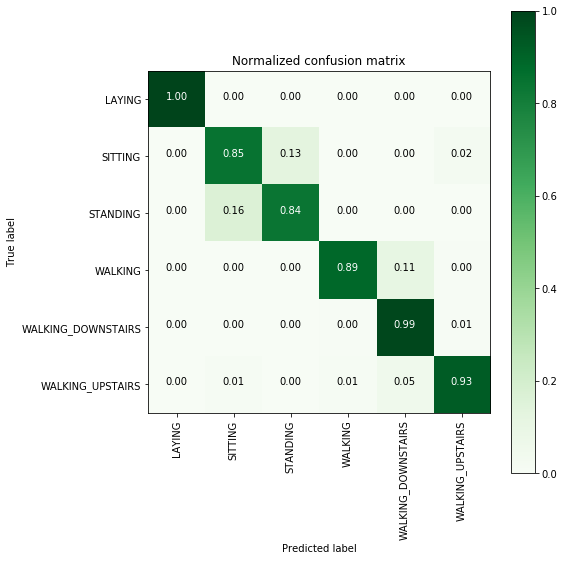

In [60]:
plt.figure(figsize=(8,8))
cm = confusion_matrix_rnn(Y_val, best_model.predict(X_val))
plot_confusion_matrix(cm, classes=labels, normalize=True, title='Normalized confusion matrix', cmap = plt.cm.Greens)
plt.show()

1) There are misclassifications for Standing, Sitting, Walking and Walking_Upstairs.

2) Laying and Walking_downstairs have been classified perfectly.

3) a)Train Accuracy = ~96%

   b)Validation Accuracy = ~92% 
 
# 8.2) Convolutional Neural Network

In [61]:
import os
os.environ['PYTHONHASHSEED'] = '0'
import random as rn
np.random.seed(36)
rn.seed(36)
#tf.set_random_seed(36)
tf.random.set_seed(36)
# Force TensorFlow to use single thread.
# Multiple threads are a potential source of non-reproducible results.
# For further details, see: https://stackoverflow.com/questions/42022950/
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1,
                              inter_op_parallelism_threads=1)

#tf.set_random_seed(36)
tf.random.set_seed(36)

sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
K.set_session(sess)

In [62]:
X_train, Y_train, X_val, Y_val = data()

In [63]:
###Scling data
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
class scaling_tseries_data(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.scale = None

    def transform(self, X):
        temp_X1 = X.reshape((X.shape[0] * X.shape[1], X.shape[2]))
        temp_X1 = self.scale.transform(temp_X1)
        return temp_X1.reshape(X.shape)

    def fit(self, X):
        # remove overlaping
        remove = int(X.shape[1] / 2)
        temp_X = X[:, -remove:, :]
        # flatten data
        temp_X = temp_X.reshape((temp_X.shape[0] * temp_X.shape[1], temp_X.shape[2]))
        scale = StandardScaler()
        scale.fit(temp_X)
        self.scale = scale
        return self

In [64]:
Scale = scaling_tseries_data()
Scale.fit(X_train)
X_train_sc = Scale.transform(X_train)
X_val_sc = Scale.transform(X_val)

In [65]:
print('Shape of scaled X train',X_train_sc.shape)
print('Shape of scaled X test',X_val_sc.shape)

Shape of scaled X train (7352, 128, 9)
Shape of scaled X test (2947, 128, 9)


## 8.2.1 With basic number of Conv Layers

In [66]:
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from keras.layers import Flatten
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform',input_shape=(128,9)))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.6))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 126, 32)           896       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 124, 32)           3104      
_________________________________________________________________
dropout_6 (Dropout)          (None, 124, 32)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 62, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1984)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 50)                99250     
_________________________________________________________________
dense_20 (Dense)             (None, 6)               

In [67]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [68]:
model.fit(X_train_sc,Y_train, epochs=30, batch_size=16,validation_data=(X_val_sc, Y_val), verbose=1)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 6s 775us/step - loss: 0.4866 - accuracy: 0.8109 - val_loss: 0.3663 - val_accuracy: 0.8772
Epoch 2/30
7352/7352 [==============================] - 3s 383us/step - loss: 0.1449 - accuracy: 0.9411 - val_loss: 0.2930 - val_accuracy: 0.9050
Epoch 3/30
7352/7352 [==============================] - 3s 371us/step - loss: 0.1125 - accuracy: 0.9516 - val_loss: 0.2247 - val_accuracy: 0.9118
Epoch 4/30
7352/7352 [==============================] - 3s 376us/step - loss: 0.1178 - accuracy: 0.9521 - val_loss: 0.2168 - val_accuracy: 0.9158
Epoch 5/30
7352/7352 [==============================] - 3s 367us/step - loss: 0.0931 - accuracy: 0.9593 - val_loss: 0.2341 - val_accuracy: 0.9230
Epoch 6/30
7352/7352 [==============================] - 3s 375us/step - loss: 0.0833 - accuracy: 0.9634 - val_loss: 0.2361 - val_accuracy: 0.9277
Epoch 7/30
7352/7352 [==============================] - 3s 367us/step - loss

The train loss and Validation loss has a lotof difference, hence there are high chances that this is overfitting.

So we add Regularization.

In [69]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform',
                 kernel_regularizer=l2(0.1),input_shape=(128,9)))
model.add(Conv1D(filters=16, kernel_size=3, activation='relu',kernel_regularizer=l2(0.06),kernel_initializer='he_uniform'))
model.add(Dropout(0.65))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 126, 32)           896       
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 124, 16)           1552      
_________________________________________________________________
dropout_7 (Dropout)          (None, 124, 16)           0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 62, 16)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 992)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 32)                31776     
_________________________________________________________________
dense_22 (Dense)             (None, 6)               

In [70]:
import math
adam = keras.optimizers.Adam(lr=0.001)
rmsprop = keras.optimizers.RMSprop(lr=0.001)
def step_decay(epoch):
    return float(0.001 * math.pow(0.6, math.floor((1+epoch)/10)))
from keras.callbacks import LearningRateScheduler
lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [71]:
model.fit(X_train_sc,Y_train, epochs=30, batch_size=16,validation_data=(X_val_sc, Y_val), verbose=1)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 3s 422us/step - loss: 3.9381 - accuracy: 0.7990 - val_loss: 1.4057 - val_accuracy: 0.8751
Epoch 2/30
7352/7352 [==============================] - 3s 413us/step - loss: 0.6835 - accuracy: 0.9215 - val_loss: 0.6216 - val_accuracy: 0.8799
Epoch 3/30
7352/7352 [==============================] - 3s 390us/step - loss: 0.3596 - accuracy: 0.9302 - val_loss: 0.5702 - val_accuracy: 0.8459
Epoch 4/30
7352/7352 [==============================] - 3s 376us/step - loss: 0.2930 - accuracy: 0.9320 - val_loss: 0.4818 - val_accuracy: 0.8765
Epoch 5/30
7352/7352 [==============================] - 3s 379us/step - loss: 0.2618 - accuracy: 0.9368 - val_loss: 0.4129 - val_accuracy: 0.8826
Epoch 6/30
7352/7352 [==============================] - 3s 379us/step - loss: 0.2561 - accuracy: 0.9347 - val_loss: 0.4762 - val_accuracy: 0.8734
Epoch 7/30
7352/7352 [==============================] - 3s 383us/step - loss

1) 88.02% Accuracy

Due to the regularization applied the Validation Loss has decreased.

# 8.2.2 Adding more Layers

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.keras import backend as K
from keras.models import Sequential
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

# get the features from the file features.txt
features = list()
with open('UCI_HAR_Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


In [4]:
# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# Utility function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).values
        ) 

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

In [5]:
def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]
   
    return y

In [6]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test

In [7]:
# Importing tensorflow
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
# Configuring a session
session_conf = tf.compat.v1.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)

In [9]:
# Import Keras
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
K.set_session(sess)

In [10]:
# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [11]:
# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

In [12]:
# Loading the train and test data
X_train, X_test, y_train, y_test = load_data()

In [13]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(7352, 128, 9) (7352,)
(2947, 128, 9) (2947,)


In [14]:
#https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/#:~:text=A%20one%20hot%20encoding%20is,is%20marked%20with%20a%201.
from numpy import array
from numpy import argmax
from keras.utils import to_categorical
# converting to array
data_y_train = y_train
data_y_train = np.array(data_y_train)

data_y_test = y_test
data_y_test = np.array(data_y_test)

# one hot encode
encoded_y_train = to_categorical(data_y_train)

encoded_y_test = to_categorical(data_y_test)

# invert encoding
inverted_y_train = argmax(encoded_y_train[0])

inverted_y_test = argmax(encoded_y_test[0])

print(data_y_train.shape)
print(data_y_test.shape)

print('********************************')

print(encoded_y_train.shape)
print(encoded_y_test.shape)

(7352,)
(2947,)
********************************
(7352, 7)
(2947, 7)


In [15]:
from keras.layers import BatchNormalization
# Importing tensorflow
#np.random.seed(36)
import tensorflow as tf
#tf.set_random_seed(36)
#tf.random.set_seed(36)
# Initiliazing the sequential model
model = Sequential() 
model.add(Conv1D(32, 3, activation='relu',kernel_initializer = 'he_normal',input_shape=(128, 9)))
#MaxPooling Layer
model.add(MaxPooling1D(2))
# Adding a dropout layer
model.add(Dropout(0.4))
# Adding a Batch Normalization Layer
model.add(BatchNormalization())
    
model.add(Conv1D(64, 3, activation='relu',kernel_initializer = 'he_normal'))
#model.add(Dropout(0.5))
model.add(MaxPooling1D(2))
model.add(BatchNormalization())
   
model.add(Conv1D(80, 3, activation='relu',kernel_initializer = 'he_normal'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.4))
model.add(BatchNormalization())
    
model.add(Flatten())

# Adding a dense output layer with sigmoid activation
model.add(Dense(504, activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.5))

model.add(Dense(252, activation= 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(126, activation='relu'))
#model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(63, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(7, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
   
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 126, 32)           896       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 63, 32)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 32)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 63, 32)            128       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 61, 64)            6208      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 30, 64)            0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 64)           

In [16]:
# Training the model
result = model.fit(X_train,
          encoded_y_train,
          batch_size=10,
          validation_data=(X_test, encoded_y_test),
          epochs=70)

Train on 7352 samples, validate on 2947 samples
Epoch 1/70
7352/7352 [==============================] - 11s 1ms/step - loss: 1.2301 - accuracy: 0.4943 - val_loss: 1.0158 - val_accuracy: 0.5114
Epoch 2/70
7352/7352 [==============================] - 8s 1ms/step - loss: 0.9202 - accuracy: 0.5974 - val_loss: 0.8463 - val_accuracy: 0.5789
Epoch 3/70
7352/7352 [==============================] - 8s 1ms/step - loss: 0.7672 - accuracy: 0.6872 - val_loss: 0.6689 - val_accuracy: 0.6417
Epoch 4/70
7352/7352 [==============================] - 8s 1ms/step - loss: 0.6795 - accuracy: 0.7352 - val_loss: 0.5105 - val_accuracy: 0.7703
Epoch 5/70
7352/7352 [==============================] - 8s 1ms/step - loss: 0.5388 - accuracy: 0.8092 - val_loss: 0.3812 - val_accuracy: 0.8802
Epoch 6/70
7352/7352 [==============================] - 8s 1ms/step - loss: 0.5033 - accuracy: 0.8288 - val_loss: 0.3838 - val_accuracy: 0.8341
Epoch 7/70
7352/7352 [==============================] - 8s 1ms/step - loss: 0.4607 - ac

Test score: 0.18210736676647027
Test accuracy: 0.9321343898773193


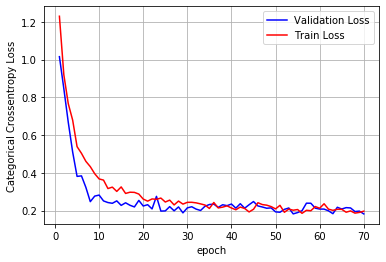

In [17]:
score = model.evaluate(X_test, encoded_y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,70+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = result.history['val_loss']
ty = result.history['loss']
ax.plot(x, vy, 'b', label="Validation Loss")
ax.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.grid()
   
fig.canvas.draw()

In [18]:
score = model.evaluate(X_test, encoded_y_test)
print(" \n Loss & Accuracy of test data on Dynamic set :",score )

2947/2947 [==============================] - 0s 86us/step
 
 Loss & Accuracy of test data on Dynamic set : [0.18210736676647027, 0.9321343898773193]


In [19]:
from prettytable import PrettyTable    
x = PrettyTable()
x.field_names = ["Model","Test Loss","Test Accuracy"]
x.add_row(['Basic LSTM','0.6149','88.90'])
x.add_row(['Adding more layers to LSTM','0.5288','90.13'])
x.add_row(['LSTM+L2 Regularization','0.6374','79.91'])
x.add_row(['LSTM+Hyperas Hyperparameter tuning','0.7085 ','62.84'])
x.add_row(['Basic CNN','0.4972','92.87'])
x.add_row(['CNN+Regularization','0.3749 ','88.02'])
x.add_row(['CNN with More Layers','0.1821','0.9321'])

print(x)

+------------------------------------+-----------+---------------+
|               Model                | Test Loss | Test Accuracy |
+------------------------------------+-----------+---------------+
|             Basic LSTM             |   0.6149  |     88.90     |
|     Adding more layers to LSTM     |   0.5288  |     90.13     |
|       LSTM+L2 Regularization       |   0.6374  |     79.91     |
| LSTM+Hyperas Hyperparameter tuning |  0.7085   |     62.84     |
|             Basic CNN              |   0.4972  |     92.87     |
|         CNN+Regularization         |  0.3749   |     88.02     |
|        CNN with More Layers        |   0.1821  |     0.9321    |
+------------------------------------+-----------+---------------+
